### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

##### Data

In [3]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')

In [4]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


##### Data Preparation

In [10]:
order_products = order_products_prior.append(order_products_train)
order_products.shape

(33819106, 4)

In [11]:
order_products = order_products.merge(products,on='product_id',how='left')
order_products = order_products.merge(aisles,on='aisle_id',how='left')
order_products = order_products.merge(departments,on='department_id',how='left')
order_products = order_products.merge(orders,on='order_id',how='left')
order_products.shape

(33819106, 15)

In [12]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [13]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 4.0+ GB


In [14]:
del products, orders, order_products_prior, order_products_train, aisles, departments
%whos

Variable         Type             Data/Info
-------------------------------------------
color            _ColorPalette    [(0.12156862745098039, 0.<...>863, 0.8117647058823529)]
np               module           <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
order_products   DataFrame                  order_id  produ<...>819106 rows x 15 columns]
pd               module           <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt              module           <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns              module           <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>


##### Analysis

In [15]:
df = order_products.groupby('aisle')['reordered'].agg(['count','sum']).rename(columns={'count':'total','sum':'reorders'})

In [16]:
df = df.sort_values('total',ascending=False).reset_index()

###### Total Orders and Reorders From Most Popular Aisles

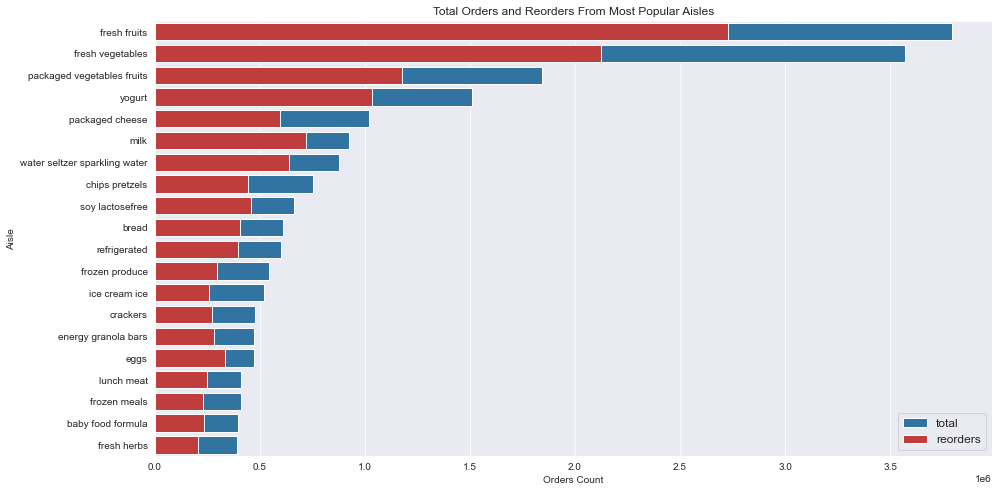

In [18]:
fig,ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(y = df.aisle[0:20],x = df.total[0:20], color = color[0], label = 'total')
ax = sns.barplot(y = df.aisle[0:20],x = df.reorders[0:20], color = color[3], label = 'reorders')
ax.set_ylabel('Aisle')
ax.set_xlabel('Orders Count')
ax.set_title('Total Orders and Reorders From Most Popular Aisles')
ax.legend(loc = 4, prop = {'size':12})
plt.show()

In [19]:
df['reorder_ratio'] = df.reorders/df.total
df = df.sort_values('reorder_ratio',ascending=False).reset_index()

###### 20 Aisles with Highest Reorder Ratio

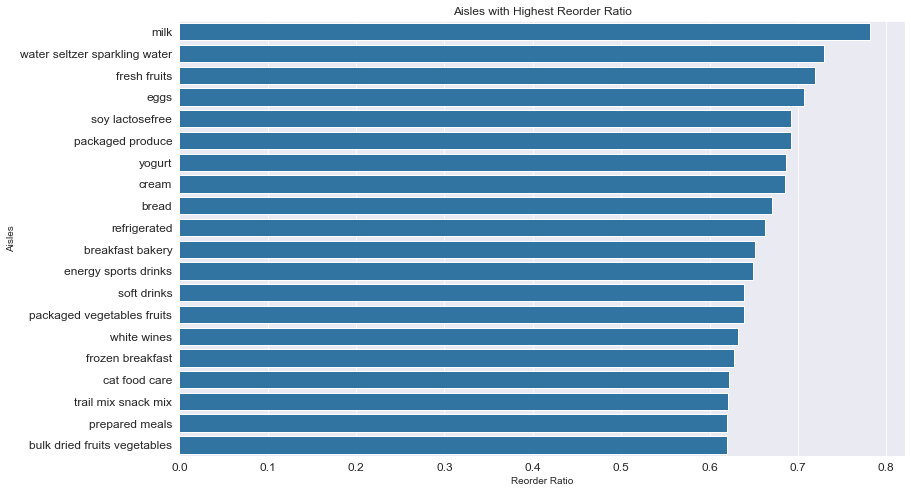

In [21]:
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.barplot(y = df.aisle[0:20], x = df.reorder_ratio[0:20], color = color[0])
ax.set_xlabel('Reorder Ratio')
ax.set_ylabel('Aisles')
ax.set_title('Aisles with Highest Reorder Ratio')
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

###### 20 Aisles with Lowest Reorder Ratio

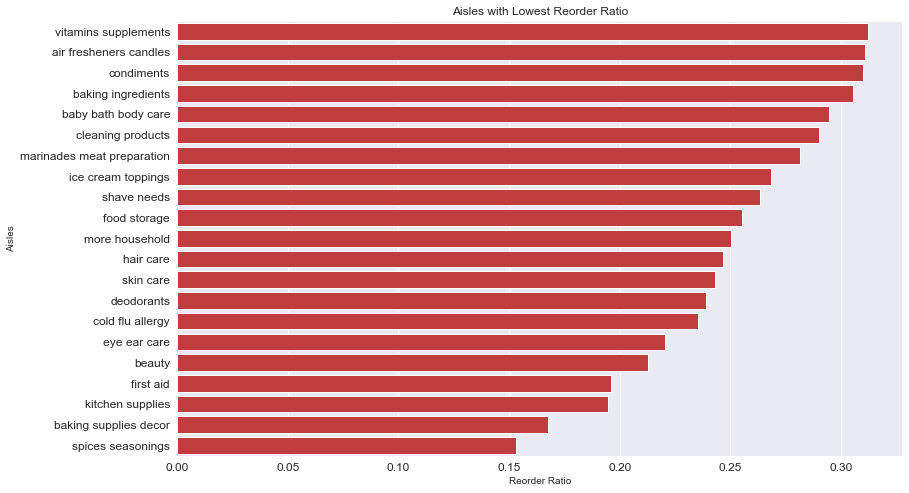

In [22]:
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.barplot(y = df.aisle[-21:], x = df.reorder_ratio[-21:], color = color[3])
ax.set_xlabel('Reorder Ratio')
ax.set_ylabel('Aisles')
ax.set_title('Aisles with Lowest Reorder Ratio')
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

In [23]:
df = order_products.groupby('department')['reordered'].agg(['count','sum']).rename(columns = {'count':'total','sum':'reorders'})

In [24]:
df = df.sort_values('total',ascending=False).reset_index()

###### Total Orders and Reorders From Departments

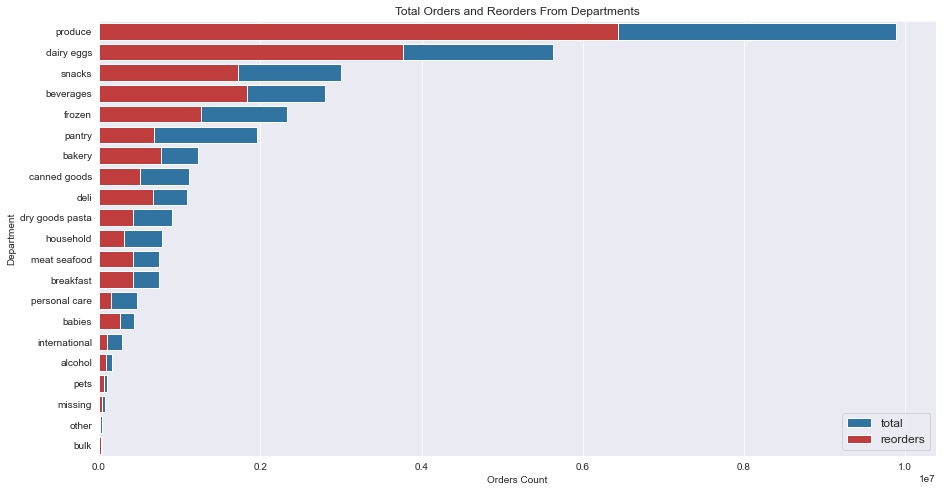

In [26]:
fig,ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(y = df.department, x = df['total'], color = color[0], label = 'total')
ax = sns.barplot(y = df.department, x = df['reorders'], color = color[3], label = 'reorders')
ax.set_ylabel('Department')
ax.set_xlabel('Orders Count')
ax.set_title('Total Orders and Reorders From Departments')
ax.legend(loc = 4, prop = {'size':12})
plt.show()

In [27]:
df['reorder_ratio'] = df.reorders/df.total
df = df.sort_values('reorder_ratio',ascending = False).reset_index()

###### Departments with Highest Reorder Ratio

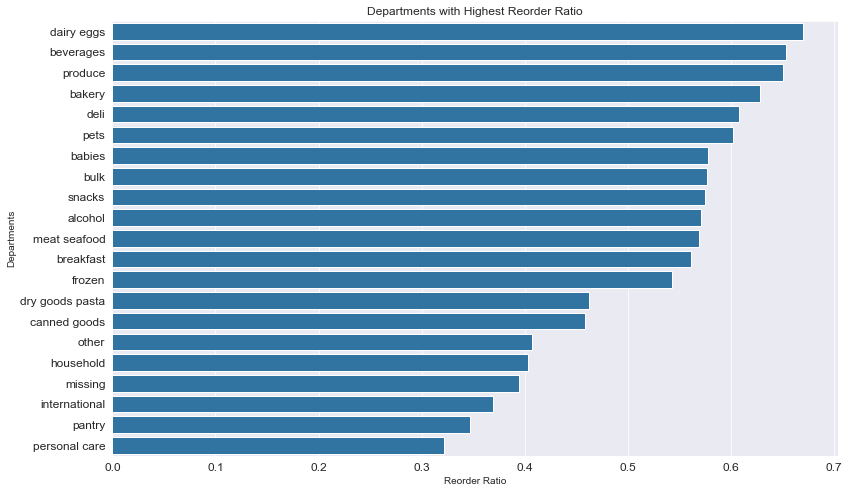

In [28]:
fig,ax = plt.subplots(figsize=(13,8))
ax = sns.barplot(y = df.department, x = df.reorder_ratio, color = color[0])
ax.set_ylabel('Departments')
ax.set_xlabel('Reorder Ratio')
ax.set_title('Departments with Highest Reorder Ratio')
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

In [29]:
df = order_products.groupby('product_name')['reordered'].agg(['count','sum']).rename(columns = {'count':'total','sum':'reorders'})

In [30]:
df = df.sort_values('total',ascending = False).reset_index()

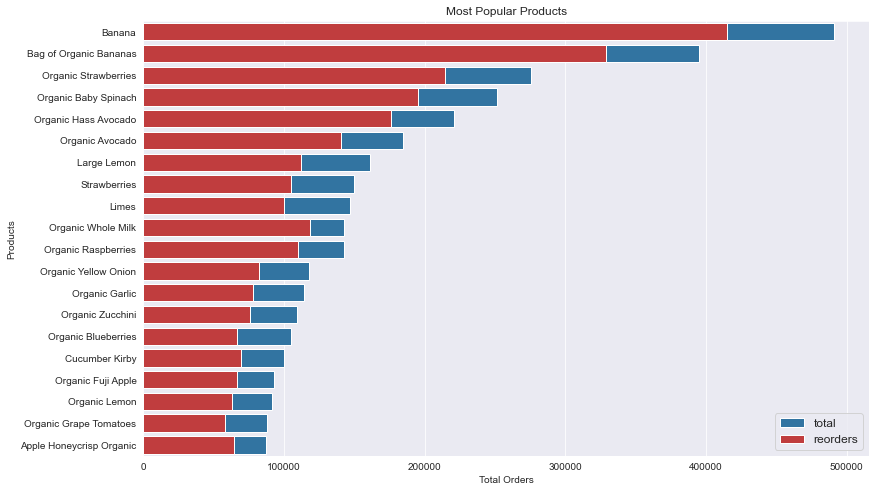

In [31]:
fig,ax = plt.subplots(figsize=(13,8))
ax = sns.barplot(y = df.product_name[0:20], x = df.total[0:20], color = color[0], label = 'total')
ax = sns.barplot(y = df.product_name[0:20], x = df.reorders[0:20], color = color[3], label = 'reorders')
ax.set_ylabel('Products')
ax.set_xlabel('Total Orders')
ax.set_title('Most Popular Products')
ax.legend(loc = 4, prop = {'size': 12})
plt.show()

In [32]:
df['reorder_ratio'] = df.reorders/df.total
df.sort_values('reorder_ratio',ascending = False).head(10)

,product_name,total,reorders,reorder_ratio
23853,Raw Veggie Wrappers,69,65,0.942029
21388,Serenity Ultimate Extrema Overnight Pads,90,84,0.933333
40147,Orange Energy Shots,13,12,0.923077
20296,Chocolate Love Bar,102,94,0.921569
30746,Soy Powder Infant Formula,35,32,0.914286
28078,Simply Sleep Nighttime Sleep Aid,45,41,0.911111
35213,"Energy Shot, Grape Flavor",22,20,0.909091
32316,Russian River Valley Reserve Pinot Noir,30,27,0.900000
23918,Bars Peanut Butter,69,62,0.898551
24218,Soy Crisps Lightly Salted,67,60,0.895522


###### Product Users

In [34]:
product_unique_users = order_products.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})

In [35]:
product_unique_users.sort_values('total_users',ascending = False).head(10)

,product_name,total_users
3677,Banana,76125
3472,Bag of Organic Bananas,65655
31923,Organic Strawberries,61129
28843,Organic Baby Spinach,56766
22415,Large Lemon,48614
23422,Limes,46658
42908,Strawberries,44857
30300,Organic Hass Avocado,44704
28807,Organic Avocado,43954
29011,Organic Blueberries,38720


In [36]:
product_unique_users = product_unique_users.merge(df, on = 'product_name', how = 'left')
product_unique_users.sort_values('reorder_ratio',ascending = False).head(20)

,product_name,total_users,total,reorders,reorder_ratio
37379,Raw Veggie Wrappers,4,69,65,0.942029
39870,Serenity Ultimate Extrema Overnight Pads,6,90,84,0.933333
28415,Orange Energy Shots,1,13,12,0.923077
8537,Chocolate Love Bar,8,102,94,0.921569
41723,Soy Powder Infant Formula,3,35,32,0.914286
40458,Simply Sleep Nighttime Sleep Aid,4,45,41,0.911111
13844,"Energy Shot, Grape Flavor",2,22,20,0.909091
38793,Russian River Valley Reserve Pinot Noir,3,30,27,0.900000
3832,Bars Peanut Butter,7,69,62,0.898551
41712,Soy Crisps Lightly Salted,7,67,60,0.895522


###### Cumulative Sum of Unique Users Per Product

In [37]:
df = product_unique_users.sort_values('total_users',ascending = False)
df['cum_users'] = df['total_users'].cumsum()
df = df.reset_index(drop=True)
df.head()

,product_name,total_users,total,reorders,reorder_ratio,cum_users
0,Banana,76125,491291,415166,0.845051,76125
1,Bag of Organic Bananas,65655,394930,329275,0.833755,141780
2,Organic Strawberries,61129,275577,214448,0.778178,202909
3,Organic Baby Spinach,56766,251705,194939,0.774474,259675
4,Large Lemon,48614,160792,112178,0.697659,308289


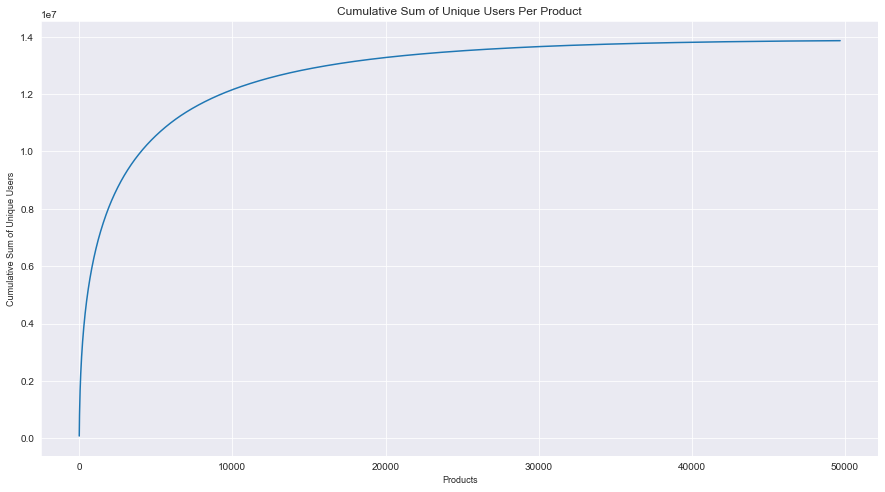

In [38]:
fig,ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x = df.index, y = df.cum_users)
ax.set_xlabel('Products', size=9)
ax.set_ylabel('Cumulative Sum of Unique Users', size=9)
ax.set_title('Cumulative Sum of Unique Users Per Product', size=12)
plt.show()

###### Total Product Orders VS Total Unique Product Buyers

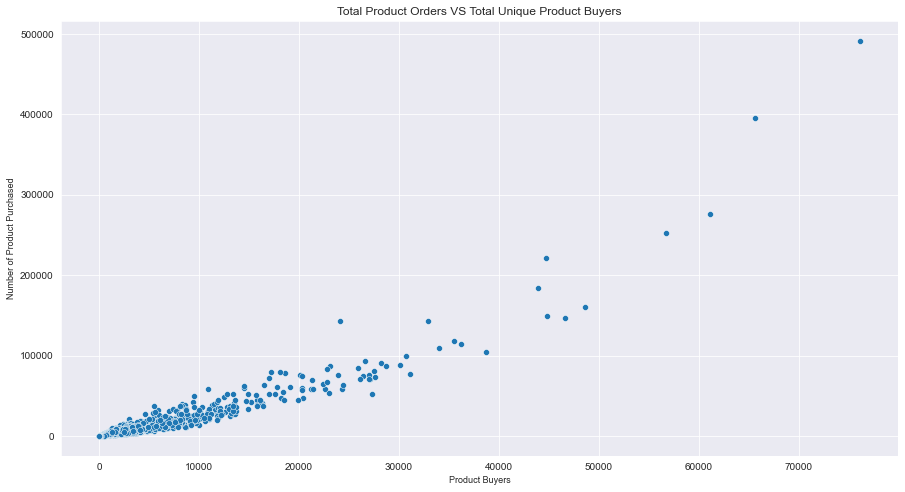

In [40]:
fig,ax = plt.subplots(figsize = (15,8))
ax = sns.scatterplot(y = product_unique_users.total, x = product_unique_users.total_users)
ax.set_xlabel('Product Buyers', size = 9)
ax.set_ylabel('Number of Product Purchased', size = 9)
ax.set_title('Total Product Orders VS Total Unique Product Buyers')
plt.show()

###### Reorder Ratio VS Total Orders

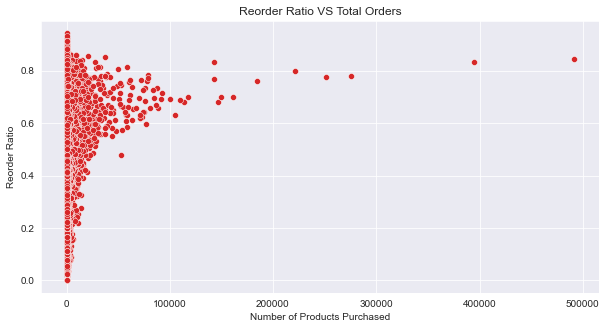

In [41]:
fig,ax = plt.subplots(figsize = (10,5))
ax = sns.scatterplot(x = product_unique_users.total, y = product_unique_users.reorder_ratio, color = color[3])
ax.set_xlabel('Number of Products Purchased')
ax.set_ylabel('Reorder Ratio')
ax.set_title('Reorder Ratio VS Total Orders')
plt.show()

###### Reorder Ratio VS Total Unique Buyers

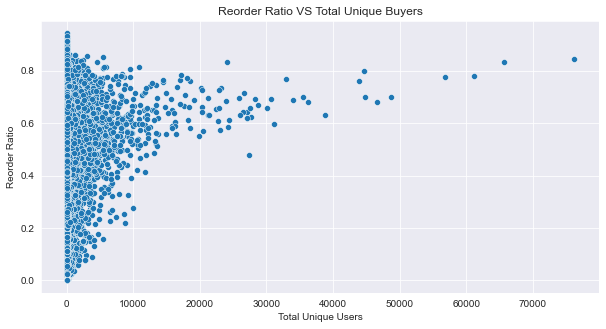

In [42]:
fig,ax = plt.subplots(figsize = (10,5))
ax = sns.scatterplot(x = product_unique_users.total_users, y = product_unique_users.reorder_ratio, color = color[0])
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Reorder Ratio')
ax.set_title('Reorder Ratio VS Total Unique Buyers')
plt.show()

###### Organic Products VS Inorganic Products

In [43]:
product_unique_users['Organic'] = product_unique_users.product_name.str.contains('Organic')
product_unique_users.head()

,product_name,total_users,total,reorders,reorder_ratio,Organic
0,#2 Coffee Filters,534,799,265,0.331665,False
1,#2 Cone White Coffee Filters,11,14,3,0.214286,False
2,#2 Mechanical Pencils,9,9,0,0.000000,False
3,#4 Natural Brown Coffee Filters,157,247,90,0.364372,False
4,& Go! Hazelnut Spread + Pretzel Sticks,81,174,93,0.534483,False


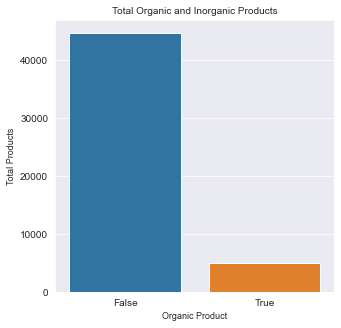

In [44]:
fig,ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic').size().index, y = product_unique_users.groupby('Organic').size().values)
ax.set_xlabel('Organic Product',size=9)
ax.set_ylabel('Total Products',size=9)
ax.set_title('Total Organic and Inorganic Products',size=10)
plt.show()

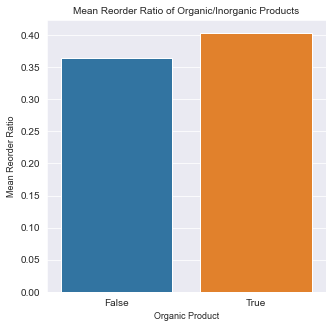

In [45]:
fig,ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic')['reorder_ratio'].mean().index, y = product_unique_users.groupby('Organic')['reorder_ratio'].mean().values)
ax.set_xlabel('Organic Product',size=9)
ax.set_ylabel('Mean Reorder Ratio',size=9)
ax.set_title('Mean Reorder Ratio of Organic/Inorganic Products',size=10)
plt.show()

###### Add to cart VS Reorder

In [46]:
df = order_products.groupby('add_to_cart_order')['reordered'].mean().reset_index()
df.head()

,add_to_cart_order,reordered
0,1,0.679302
1,2,0.677135
2,3,0.658426
3,4,0.637350
4,5,0.617598


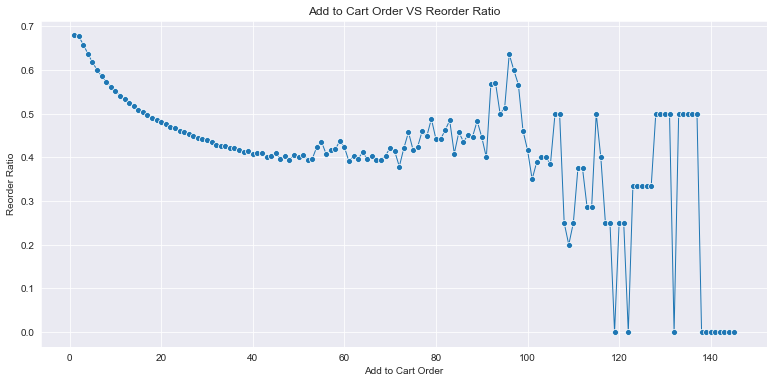

In [48]:
fig,ax = plt.subplots(figsize=(13,6))
ax = sns.lineplot(x = df.add_to_cart_order, y = df.reordered, lw = 1, marker = 'o')
ax.set_xlabel('Add to Cart Order')
ax.set_ylabel('Reorder Ratio')
ax.set_title('Add to Cart Order VS Reorder Ratio')
plt.show()

###### Most Popular Products on Different Days of Week

In [49]:
df = order_products.groupby(['order_dow','product_name']).size().reset_index(name = 'counts')
df = df.sort_values(['order_dow','counts'], ascending = [True, False])
df = df.groupby('order_dow').head(5).reset_index(drop=True)

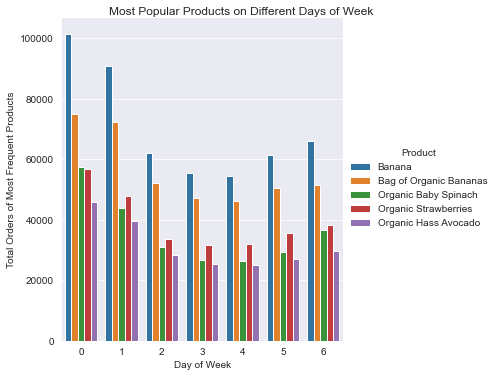

In [50]:
ax = sns.catplot(x = 'order_dow', y = 'counts', hue = 'product_name', data = df, kind = 'bar', legend = False)
ax.add_legend(title = 'Product')
ax.set_axis_labels('Day of Week', 'Total Orders of Most Frequent Products')
ax.fig.suptitle('Most Popular Products on Different Days of Week', va='baseline', ha='center')
ax.savefig('Most Popular Products on Different Days of Week.png')